## Обучение без учителя

### Задание 1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
boston = load_boston()
X = boston.data
y = boston.target
fn = boston.feature_names

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=fn)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=fn)

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

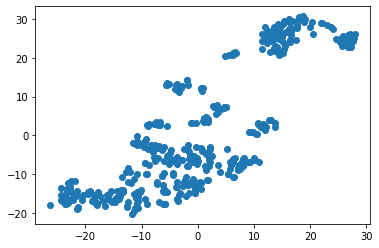

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

In [14]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
tr_labels = kmeans.fit_predict(X_train_scaled)

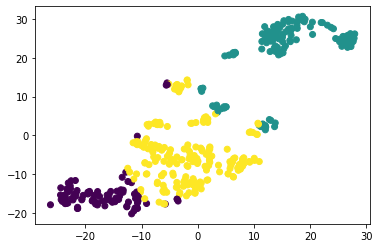

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=tr_labels)
plt.show()

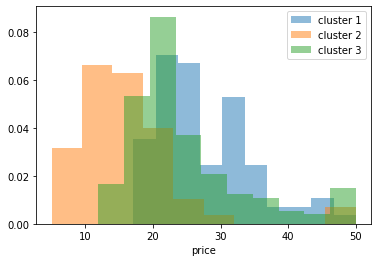

In [28]:
plt.hist(y_train[tr_labels == 0], density=True, alpha=0.5)
plt.hist(y_train[tr_labels == 1], density=True, alpha=0.5)
plt.hist(y_train[tr_labels == 2], density=True, alpha=0.5)
plt.legend(['cluster 1', 'cluster 2', 'cluster 3'])
plt.xlabel('price')
plt.show()

In [42]:
print(X_train.loc[tr_labels == 0, "CRIM"].mean())
print(X_train.loc[tr_labels == 1, "CRIM"].mean(), "high criminality in second cluster")
print(X_train.loc[tr_labels == 2, "CRIM"].mean())
print("-----------------------")
print(y_train[tr_labels == 0].mean())
print(y_train[tr_labels == 1].mean(), "low prices in second cluster")
print(y_train[tr_labels == 2].mean())

0.07356558139534886
10.797028425196853 high criminality in second cluster
0.42166020942408367
-----------------------
27.78837209302326
16.165354330708663 low prices in second cluster
24.958115183246072


### Задание 3

In [43]:
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=fn)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=fn)

In [44]:
test_labels = kmeans.fit_predict(X_test_scaled)

In [45]:
print(X_test.loc[test_labels == 0, "CRIM"].mean())
print(X_test.loc[test_labels == 1, "CRIM"].mean(), "high criminality in second cluster")
print(X_test.loc[test_labels == 2, "CRIM"].mean())
print("-----------------------")
print(y_test[test_labels == 0].mean())
print(y_test[test_labels == 1].mean(), "low prices in second cluster")
print(y_test[test_labels == 2].mean())


0.08308461538461537
9.419181842105264 high criminality in second cluster
0.22250117647058823
-----------------------
34.55384615384616
16.710526315789473 low prices in second cluster
21.71764705882353
